In [1]:
# Import all necessary libraries.
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from sklearn import tree
import pydot
from IPython.display import Image  
import seaborn as sns
from matplotlib.colors import ListedColormap


C:\Users\Mauro\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split (X, y, test_size=0.25, random_state=42)

In [3]:
target_names = ['Class 0', 'Class 1']
print(target_names)

['Class 0', 'Class 1']


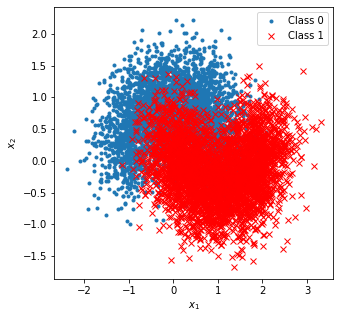

In [4]:
idx0 = np.argwhere(y_train == 0)
idx1 = np.argwhere(y_train == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x_train[idx0,0], x_train[idx0,1], '.', label='Class 0')
plt.plot(x_train[idx1,0], x_train[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [9]:
# Set parameters for grid-search.
param_grid = [{'max_leaf_nodes': list(range(2, 100)), 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# Instantiate DT class.
reg = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(reg, param_grid, cv=5, verbose=3, n_jobs=-1)

# Find best hyperparameters.
grid_search.fit(x_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 980 candidates, totalling 4900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3048 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 4900 out of 4900 | elapsed:    9.1s finished


{'max_leaf_nodes': 34, 'min_samples_leaf': 3}

In [10]:
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=3, max_leaf_nodes=34)

clf.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=34,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [11]:
y_pred = clf.predict(x_test)

In [12]:

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y_test, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.8632


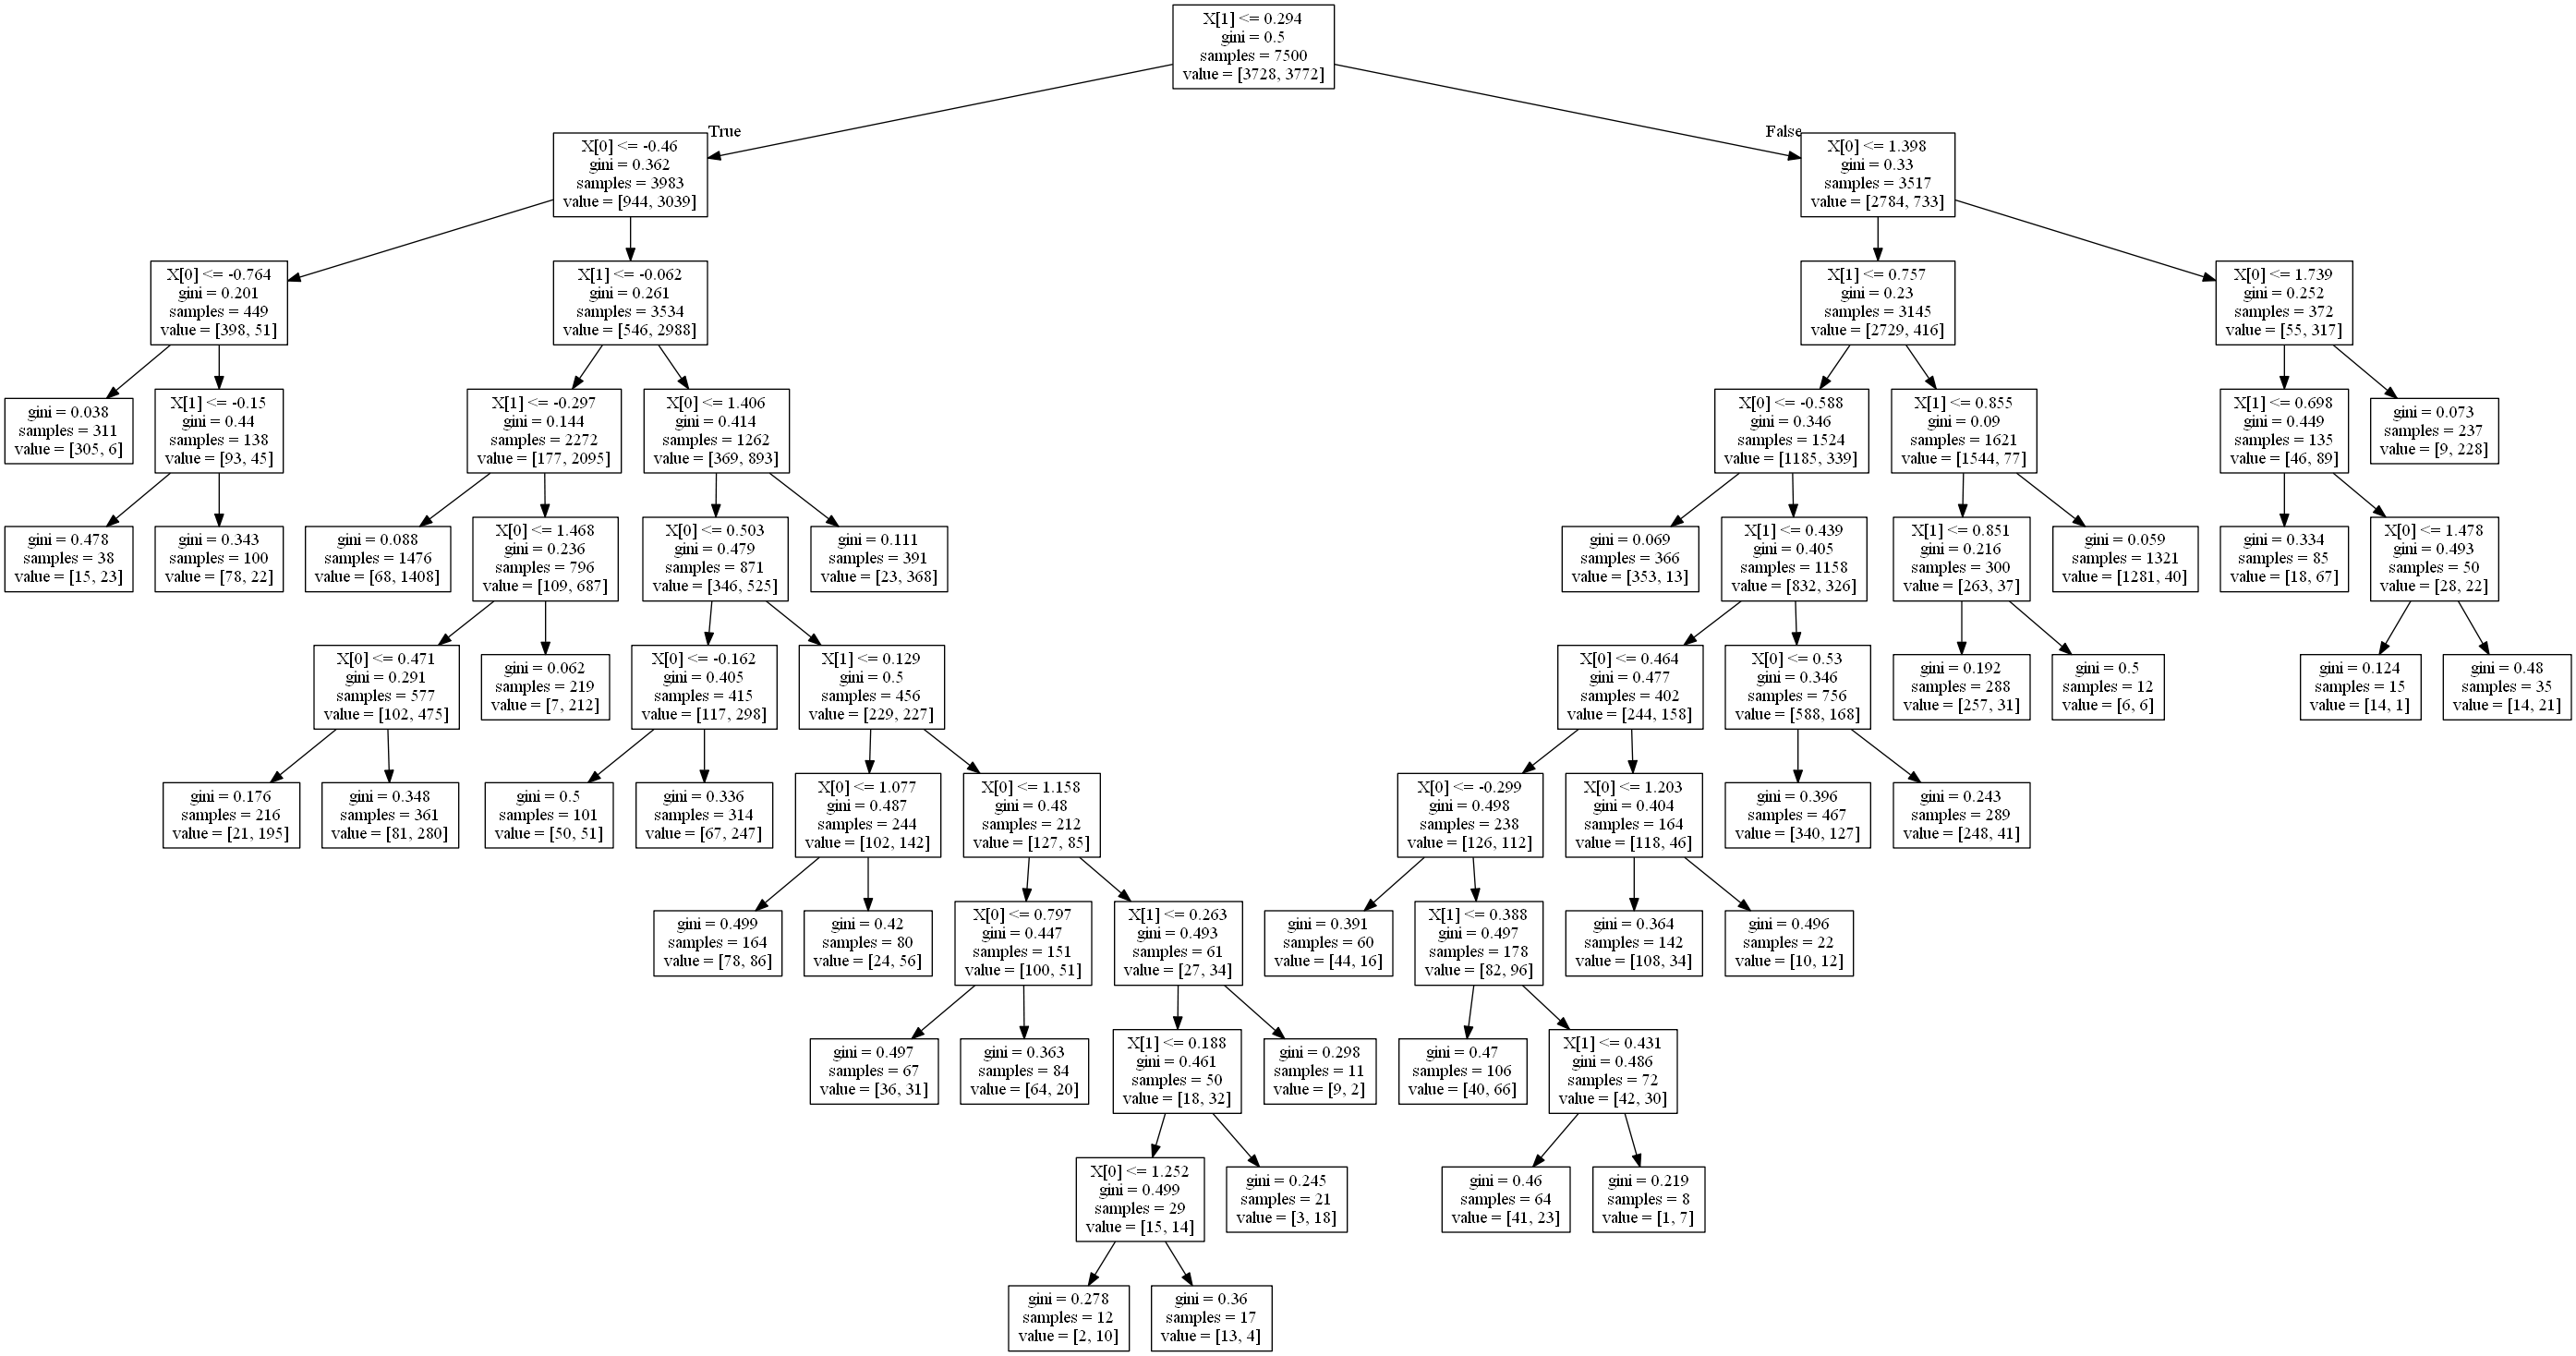

In [13]:
# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

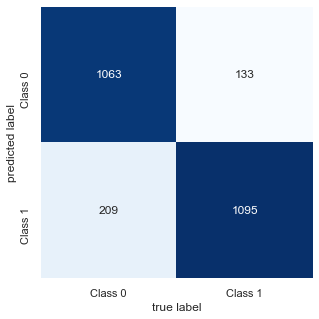

In [14]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=target_names, yticklabels=target_names, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.show()

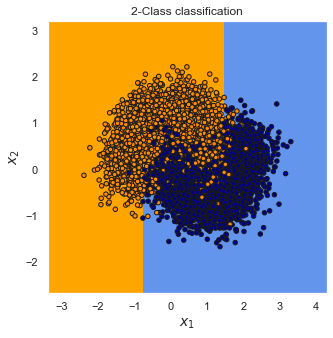

In [15]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.figure(figsize=(5, 5))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification")

plt.show()

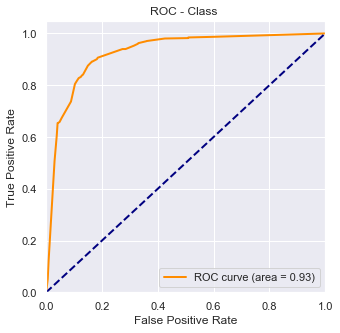

In [16]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")

plt.show()